## Summary

---

## Imports

In [1]:
import io
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import SVG, Image

## Parameters

In [2]:
NOTEBOOK_DIR = Path("50_create_figures").resolve()
NOTEBOOK_DIR.mkdir(exist_ok=True)

NOTEBOOK_DIR

PosixPath('/home/kimlab5/strokach/workspace/elaspic/elaspic2-cagi6/notebooks/50_create_figures')

## Data

In [3]:
model_names = {
    "proteinsolver-protbert-rosetta_ddg-alphafold_wt": "Combined",
    "proteinsolver-protbert-rosetta_ddg-alphafold_wt-alphafold_change": "Combined",
    "proteinsolver": "ProteinSolver (wt, mut)",
    "protbert": "ProtBert (wt, mut)",
    "rosetta_ddg": "Rosetta (cartesian_ddg)",
    "alphafold_wt": "AlphaFold (wt)",
    "alphafold_change": "AlphaFold (mut)",
    #
    #     "† `base` + `AFwt",
    #     "`base` + `AFwt",
    #     "† `base` + `AFwt` + `AFmut",
    #     "base` + `AFwt` + `AFmut",
}

In [4]:
# No AFchange features
text = """\
col,num_rows,spearman_rho,auc,precision,description
pred_6d02ae59_optimized,81595,0.7126101934569414,0.9302800089637497,0.880811545138274,proteinsolver-protbert-rosetta_ddg-alphafold_wt
pred_7f9826be_optimized,81595,0.7124691243200059,0.9301948302362175,0.880199093804648,† `base` + `AFwt
pred_fd28687b_optimized,81595,0.7114664224991962,0.9295893904706803,0.8794599027426224,`base` + `AFwt
pred_bfda8ca8_optimized,81595,0.7030689431700953,0.9245189220506452,0.872121834543896,alphafold_wt
pred_a6b35daa_optimized,81595,0.6743788270565445,0.9071955894191768,0.845464460517332,protbert
pred_2cf623ec_optimized,81595,0.6717861214568219,0.9056300920422187,0.8439723991520722,rosetta_ddg
pred_1855e7a4_optimized,81595,0.6589128014374122,0.8978570734912574,0.8329363544743443,proteinsolver
"""

buf = io.StringIO()
buf.write(text)
buf.seek(0)
scores_df = pd.read_csv(buf)

scores_df["name"] = scores_df["description"].map(model_names)

scores_df

,col,num_rows,spearman_rho,auc,precision,description,name
0,pred_6d02ae59_optimized,81595,0.712610,0.930280,0.880812,proteinsolver-protbert-rosetta_ddg-alphafold_wt,Combined
1,pred_7f9826be_optimized,81595,0.712469,0.930195,0.880199,† `base` + `AFwt,NaN
2,pred_fd28687b_optimized,81595,0.711466,0.929589,0.879460,`base` + `AFwt,NaN
3,pred_bfda8ca8_optimized,81595,0.703069,0.924519,0.872122,alphafold_wt,AlphaFold (wt)
4,pred_a6b35daa_optimized,81595,0.674379,0.907196,0.845464,protbert,"ProtBert (wt, mut)"
5,pred_2cf623ec_optimized,81595,0.671786,0.905630,0.843972,rosetta_ddg,Rosetta (cartesian_ddg)
6,pred_1855e7a4_optimized,81595,0.658913,0.897857,0.832936,proteinsolver,"ProteinSolver (wt, mut)"


In [5]:
# With AFchange features
text = """\
col,num_rows,spearman_rho,auc,precision,description
pred_900500fe_optimized,17253,0.7354856043327243,0.9482191810766243,0.9064460127045698,† `base` + `AFwt` + `AFmut
pred_b2d0dfb9_optimized,17253,0.7346465855388026,0.947707866763327,0.9059681098917662,proteinsolver-protbert-rosetta_ddg-alphafold_wt-alphafold_change
pred_be3bdad5_optimized,17253,0.7345652166112319,0.9476582789619261,0.9056403859073822,base` + `AFwt` + `AFmut
pred_fd28687b_optimized,17253,0.732317473690829,0.9462884608647142,0.9026205233330327,`base` + `AFwt
pred_7f9826be_optimized,17253,0.7299587820757071,0.944851028482742,0.9006481903084101,† `base` + `AFwt
pred_6d02ae59_optimized,17253,0.7281784682664034,0.9437660707446643,0.8992294897475985,proteinsolver-protbert-rosetta_ddg-alphafold_wt
pred_bfda8ca8_optimized,17253,0.7148309423466335,0.9356318297389664,0.8868176529446166,alphafold_wt
pred_a6b35daa_optimized,17253,0.6985532259113003,0.9257118739128337,0.8728662959252519,protbert
pred_b93fddbb_optimized,17253,0.6990239962585558,0.9259987704860353,0.8714278272872622,alphafold_change
pred_2cf623ec_optimized,17253,0.6817438107602027,0.9154678905510983,0.8555810561252877,rosetta_ddg
pred_1855e7a4_optimized,17253,0.6741823722269124,0.9108598033675988,0.8479407023908969,proteinsolver
"""

buf = io.StringIO()
buf.write(text)
buf.seek(0)
scores_with_afchange_df = pd.read_csv(buf)

scores_with_afchange_df["name"] = scores_with_afchange_df["description"].map(model_names)

scores_with_afchange_df

,col,num_rows,spearman_rho,auc,precision,description,name
0,pred_900500fe_optimized,17253,0.735486,0.948219,0.906446,† `base` + `AFwt` + `AFmut,NaN
1,pred_b2d0dfb9_optimized,17253,0.734647,0.947708,0.905968,proteinsolver-protbert-rosetta_ddg-alphafold_w...,Combined
2,pred_be3bdad5_optimized,17253,0.734565,0.947658,0.905640,base` + `AFwt` + `AFmut,NaN
3,pred_fd28687b_optimized,17253,0.732317,0.946288,0.902621,`base` + `AFwt,NaN
4,pred_7f9826be_optimized,17253,0.729959,0.944851,0.900648,† `base` + `AFwt,NaN
5,pred_6d02ae59_optimized,17253,0.728178,0.943766,0.899229,proteinsolver-protbert-rosetta_ddg-alphafold_wt,Combined
6,pred_bfda8ca8_optimized,17253,0.714831,0.935632,0.886818,alphafold_wt,AlphaFold (wt)
7,pred_a6b35daa_optimized,17253,0.698553,0.925712,0.872866,protbert,"ProtBert (wt, mut)"
8,pred_b93fddbb_optimized,17253,0.699024,0.925999,0.871428,alphafold_change,AlphaFold (mut)
9,pred_2cf623ec_optimized,17253,0.681744,0.915468,0.855581,rosetta_ddg,Rosetta (cartesian_ddg)


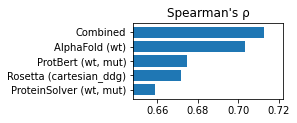

In [6]:
score = "spearman_rho"
xlim = (0.648, 0.722)
xlabel = "Spearman's ρ"

df = scores_df[[score, "name"]].dropna().sort_values(score, ascending=True)

fig, ax = plt.subplots(figsize=(4, 1.5))
out = ax.barh(df["name"], df[score])
# ax.set_xticklabels(df["name"], rotation=90)

ax.set_xlim(*xlim)
ax.set_title(xlabel)

fig.subplots_adjust(left=0.45, bottom=0.14, right=0.97, top=0.84, wspace=0, hspace=0)
fig.savefig(NOTEBOOK_DIR.joinpath(f"{score}.svg"), dpi=300)
fig.savefig(NOTEBOOK_DIR.joinpath(f"{score}.pdf"), dpi=300)
fig.savefig(NOTEBOOK_DIR.joinpath(f"{score}.png"), dpi=300)

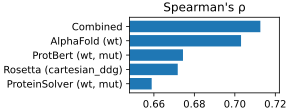

In [7]:
SVG(NOTEBOOK_DIR.joinpath(f"{score}.svg"))

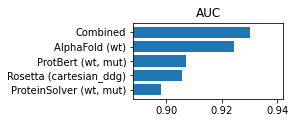

In [8]:
score = "auc"
xlim = (0.888, 0.942)
xlabel = "AUC"

df = scores_df[[score, "name"]].dropna().sort_values(score, ascending=True)

fig, ax = plt.subplots(figsize=(4, 1.5))
out = ax.barh(df["name"], df[score])
# ax.set_xticklabels(df["name"], rotation=90)

ax.set_xlim(*xlim)
ax.set_title(xlabel)

fig.subplots_adjust(left=0.45, bottom=0.14, right=0.97, top=0.84, wspace=0, hspace=0)
fig.savefig(NOTEBOOK_DIR.joinpath(f"{score}.svg"), dpi=300)
fig.savefig(NOTEBOOK_DIR.joinpath(f"{score}.pdf"), dpi=300)
fig.savefig(NOTEBOOK_DIR.joinpath(f"{score}.png"), dpi=300)

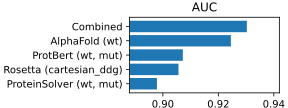

In [9]:
SVG(NOTEBOOK_DIR.joinpath(f"{score}.svg"))

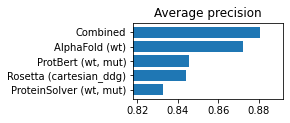

In [10]:
score = "precision"
xlim = (0.818, 0.892)
xlabel = "Average precision"

df = scores_df[[score, "name"]].dropna().sort_values(score, ascending=True)

fig, ax = plt.subplots(figsize=(4, 1.5))
out = ax.barh(df["name"], df[score])
# ax.set_xticklabels(df["name"], rotation=90)

ax.set_xlim(*xlim)
ax.set_title(xlabel)

fig.subplots_adjust(left=0.45, bottom=0.14, right=0.97, top=0.84, wspace=0, hspace=0)
fig.savefig(NOTEBOOK_DIR.joinpath(f"{score}.svg"), dpi=300)
fig.savefig(NOTEBOOK_DIR.joinpath(f"{score}.pdf"), dpi=300)
fig.savefig(NOTEBOOK_DIR.joinpath(f"{score}.png"), dpi=300)

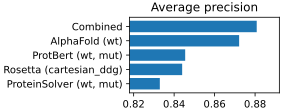

In [11]:
SVG(NOTEBOOK_DIR.joinpath(f"{score}.svg"))